In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:

dados= pd.DataFrame({"Dataset":["KP","SH0ES","SH0ES","CHP","SH0ES16","SH0ES18","SH0ES19","SH0ES21","WMAP1",
                                "WMAP3","WMAP5","WMAP7","WMAP9","Planck13","Planck15","BAO","Planck18"],"H0":[72.0,74.2,73.08,74.3,73.24,73.48,74.03,73.20,72.0,73.0,71.9,70.4,69.32,67.3,67.8,66.98,67.27],
                     "Ano":[2001,2009,2011,2012,2016,2018,2019,2021,2003,2007,2009,2011,2013,2014,2016,2018,2020],
                     "Erro":[8.0,3.6,2.4,2.3,1.74,1.66,1.42,1.3,5.0,3.0,2.6,2.5,0.80,1.20,0.90,1.18,0.60],
                     })

In [68]:
dados

,Dataset,H0,Ano,Erro
0,KP,72.00,2001,8.00
1,SH0ES,74.20,2009,3.60
2,SH0ES,73.08,2011,2.40
3,CHP,74.30,2012,2.30
4,SH0ES16,73.24,2016,1.74
5,SH0ES18,73.48,2018,1.66
6,SH0ES19,74.03,2019,1.42
7,SH0ES21,73.20,2021,1.30
8,WMAP1,72.00,2003,5.00
9,WMAP3,73.00,2007,3.00


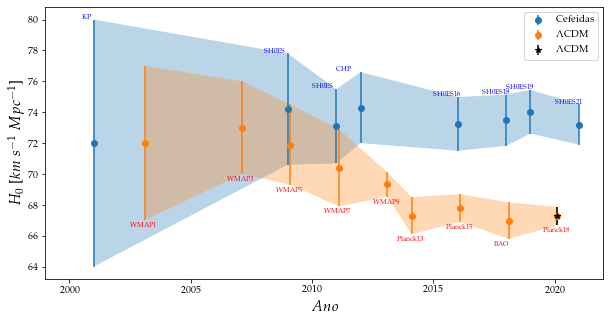

In [82]:
"""Separando os dados para plot"""

y=dados["H0"].iloc[:8]
Y=dados["H0"].iloc[8:]
x=dados["Ano"].iloc[:8]
X=dados["Ano"].iloc[8:]
yerr=dados["Erro"].iloc[:8]
Yerr=dados["Erro"].iloc[8:]
y1=y -yerr
y2=y +yerr
Y1=Y -Yerr
Y2=Y +Yerr

x

y1

y2

"""plot"""

import matplotlib.axes  as ax
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True) # para fazer o grafico com letra de LaTex

fig,ax=plt.subplots(figsize=(10,5))
#plt.figure(figsize=(30,15))
plt.errorbar(x,y,yerr=yerr,fmt="o",xlolims=True,label="Cefeidas")
plt.fill_between(x,y1,y2 ,alpha=0.3)
plt.errorbar(X+0.1,Y,yerr=Yerr,fmt="o",xlolims=True,label="$\Lambda$CDM")
plt.errorbar(dfplanck["Ano"]+0.1,dfplanck["H0"],yerr=dfplanck["Erro"],fmt="*",xlolims=True,label="$\Lambda$CDM",color="black")
plt.fill_between(X+0.1,Y1,Y2 ,alpha=0.3)
plt.ylabel("$H_0$ [$km$ $s^{-1}$ $Mpc^{-1}$]",fontsize=15)
plt.xlabel("$Ano$",fontsize=15)
plt.xlim(1999,2022)
ax.annotate(dados["Dataset"].iloc[0],xy=(dados["Ano"].iloc[0] -0.5 ,dados["H0"].iloc[0] + dados["Erro"].iloc[0]),fontsize=7,color="blue")
for j in np.arange(8,17):
  ax.annotate(dados["Dataset"].iloc[j],xy=(dados["Ano"].iloc[j] - 0.5,dados["H0"].iloc[j]+
  - dados["Erro"].iloc[j] - 0.5),fontsize=7,color="red")
for i in np.arange(1,8):
  ax.annotate(dados["Dataset"].iloc[i],xy=(dados["Ano"].iloc[i] -1 ,dados["H0"].iloc[i] + dados["Erro"].iloc[i]),fontsize=7,color="blue")

plt.legend()
plt.savefig("h.pdf")
plt.show()

In [59]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True) # para fazer o grafico com letra de LaTex

In [69]:
dados=dados.sort_values(by="Ano",ascending=False)
dfplanck=dados.loc[dados["Dataset"]=="Planck18"]
#dfplanck=dados.loc[dados["Dataset"]=="Planck18"]
dados=dados.loc[dados["Dataset"]!="Planck18"]

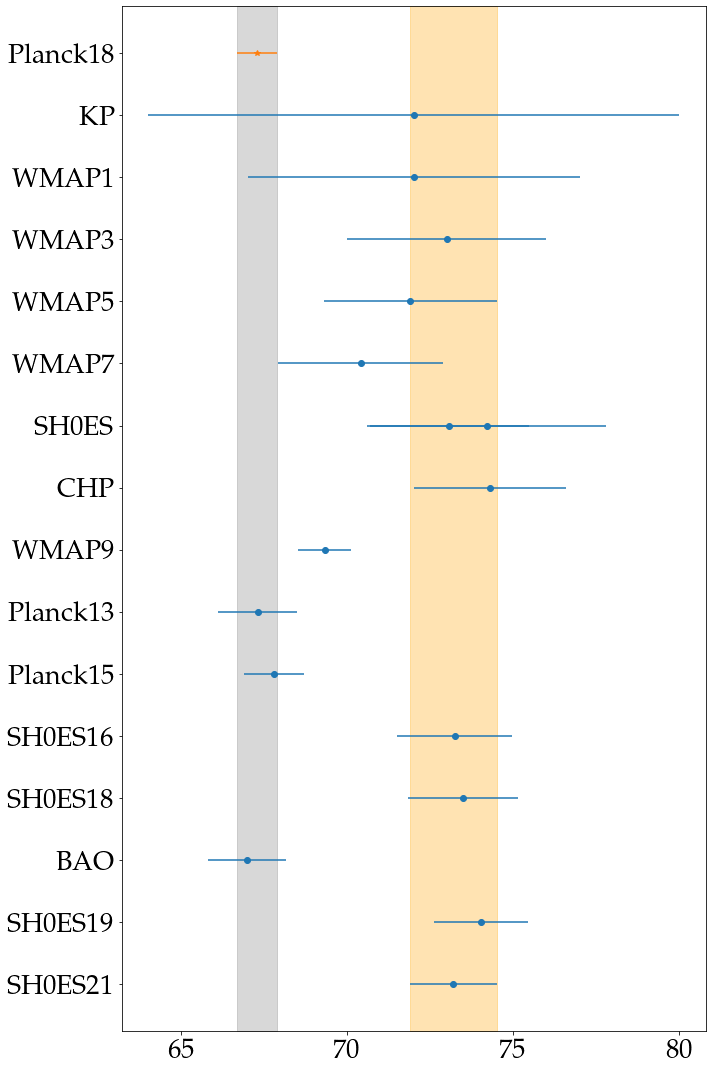

In [ ]:

plt.figure(figsize=(10,15))
plt.errorbar(dados["H0"],dados["Dataset"],xerr=dados["Erro"],fmt="o")
plt.errorbar(dfplanck["H0"],dfplanck["Dataset"],xerr=dfplanck["Erro"],fmt="*")
# Encontrar os limites para a faixa
x_min = 67.27- 0.60
x_max = 67.27+ 0.60
x_min_sn = 73.20- 1.30
x_max_sn = 73.20+ 1.30

# Desenhar a faixa
plt.ylim(plt.ylim()[0], plt.ylim()[1])
plt.fill_betweenx(y=plt.ylim(), x1=x_min, x2=x_max, color='gray', alpha=0.3)
plt.fill_betweenx(y=plt.ylim(), x1=x_min_sn, x2=x_max_sn, color='orange', alpha=0.3)
plt.tick_params(axis='x', labelsize=27)
plt.tick_params(axis='y', labelsize=27)
plt.tight_layout()
plt.savefig("Bruno.jpeg",dpi=500, bbox_inches='tight')
plt.show()